In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
zip_path='/content/drive/MyDrive/plant_disease_detection.zip'
extracted_path='/content'
if os.path.exists(zip_path):
  try:
    with zipfile.ZipFile(zip_path,'r') as zip_read:
      zip_read.extractall(extracted_path)
    print(f"File has succesfully extracted from {zip_path} to {extracted_path}")
  except Exception as e:
    print(e)
else:
  print(f"File not found at {zip_path}")

File has succesfully extracted from /content/drive/MyDrive/plant_disease_detection.zip to /content


In [3]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import glob as gb
import cv2
import pandas as pd
import pathlib

In [4]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [5]:
size=224

In [6]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0,
    height_shift_range=0,
    rescale=1/255.0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size,size),
    subset='training',
    batch_size=164,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=True

)

Found 63282 images belonging to 38 classes.


In [7]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

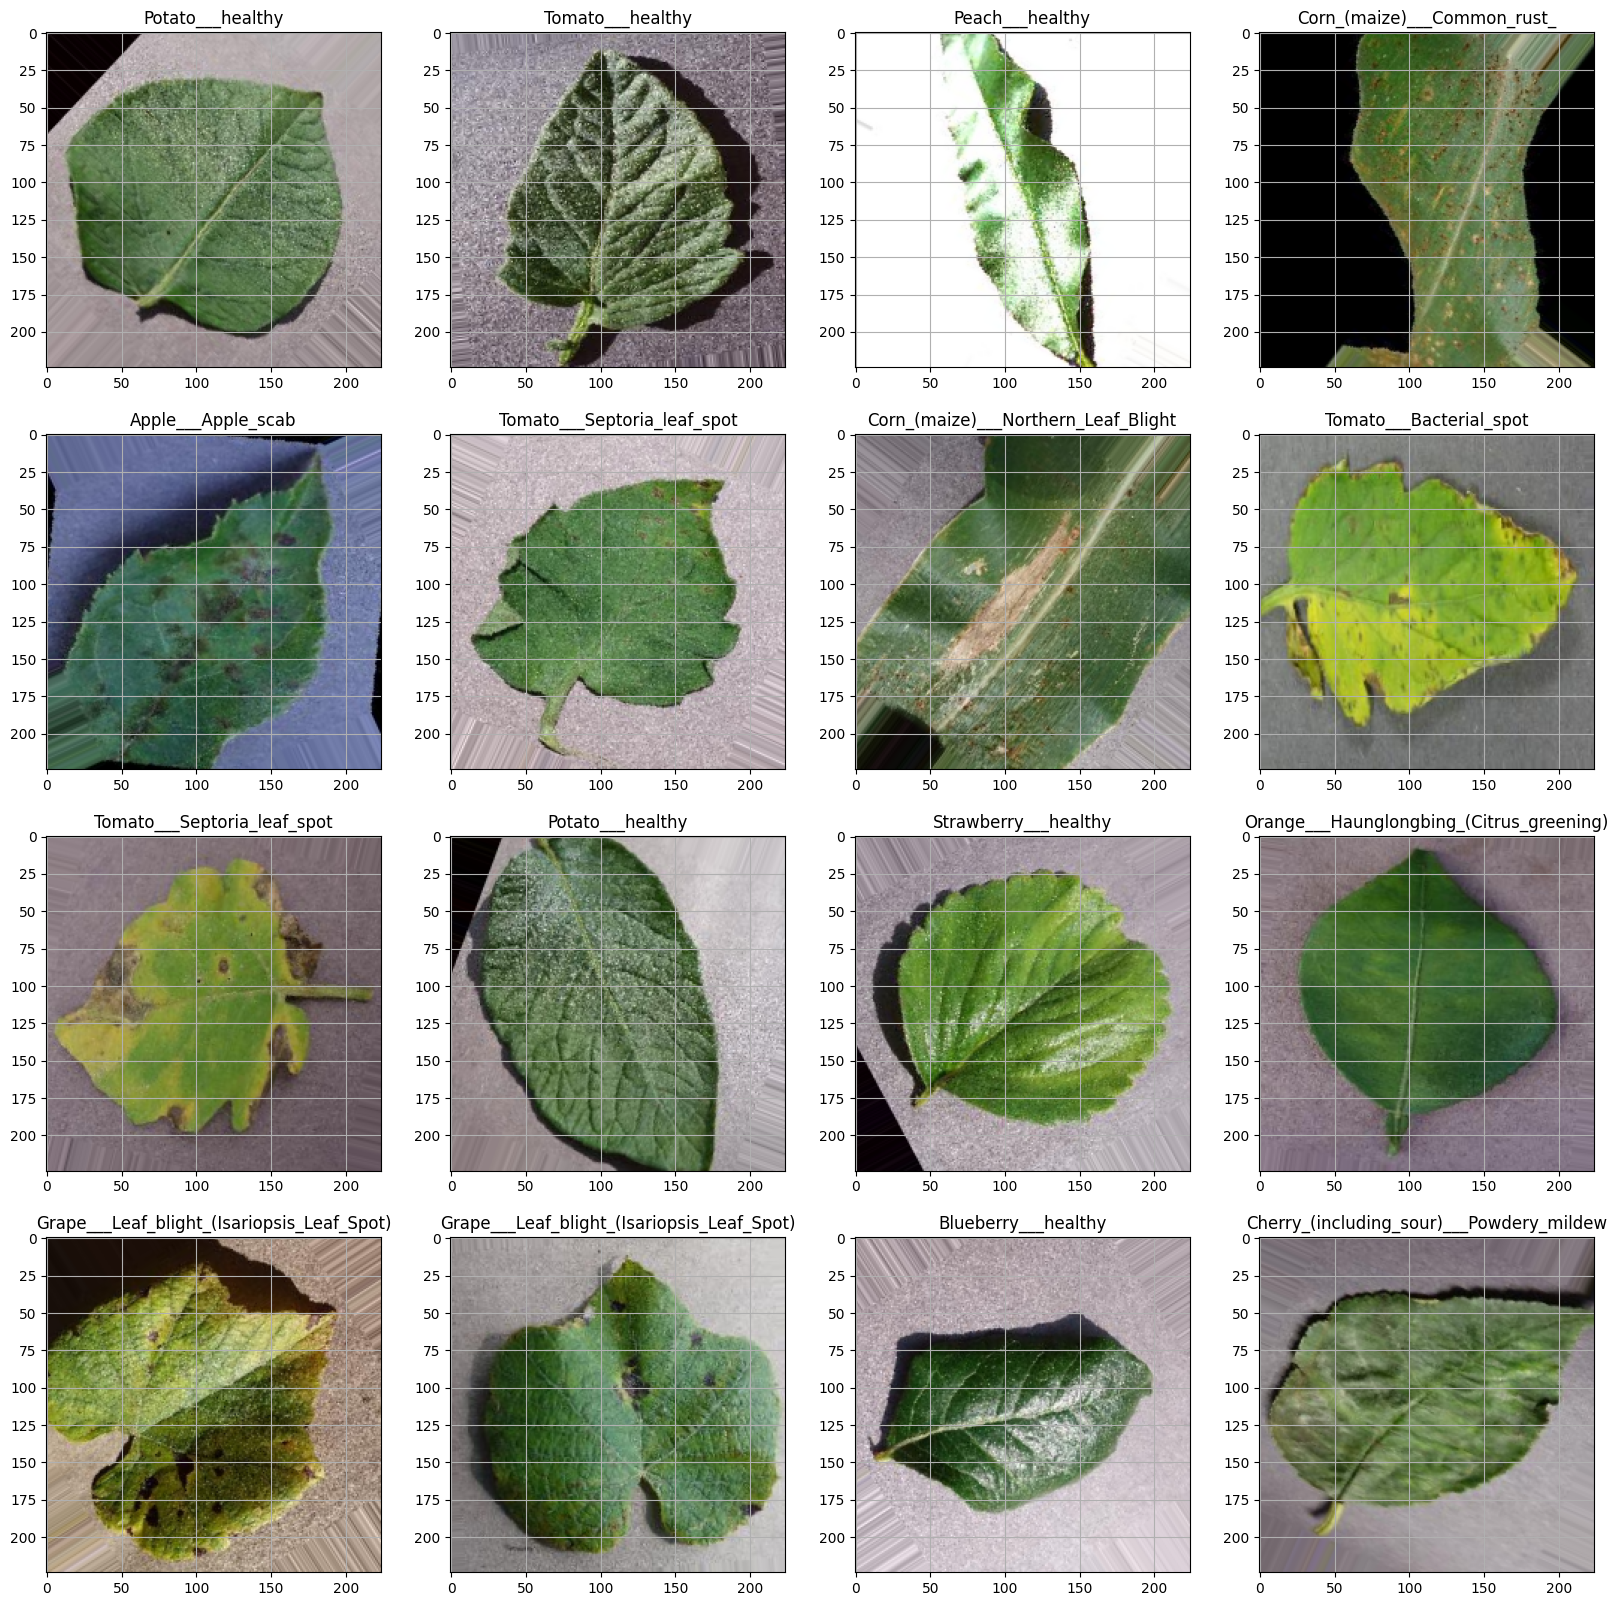

In [8]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch,Y_batch in train_generator:
 for i in range(0,16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_batch[i])
  plt.title(classes[np.where(Y_batch[i]==1)[0][0]])
  plt.grid(None)
 plt.show()
 break


In [9]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [10]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    valid,
    target_size=(size,size),
    subset="validation",
    batch_size=164,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'


)

Found 1742 images belonging to 38 classes.


In [11]:
valid_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [13]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    test,
    target_size=(size,size),
    batch_size=164,
    shuffle=False,
    color_mode='rgb',
    class_mode='categorical'


)


Found 17572 images belonging to 38 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=7, activation='relu', strides=1,
                 input_shape=(224, 224, 3), padding="same", name="Conv2D_1"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_1"))
model.add(Conv2D(filters=64, kernel_size=5, strides=1, padding='same',
                 activation='relu', name="Conv2D_2"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_2"))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same',
                 activation='relu', name="Conv2D_3"))
model.add(MaxPooling2D(pool_size=2, name="MaxPool_3"))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same',
                 activation='relu', name="Conv2D_4"))

model.add(MaxPooling2D(pool_size=2, name="MaxPool_4"))

model.add(Flatten(name="Flatten1"))

model.add(Dense(units=128, activation='relu', name="Dense1"))
model.add(Dropout(0.2, name="Dropout1"))

model.add(Dense(units=64, activation='relu', name="Dense2"))
model.add(Dropout(0.2, name="Dropout2"))

model.add(Dense(units=38, activation='softmax', name="Dense3"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)               │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_3 (MaxPooling2D)        │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_4 (MaxPooling2D)        │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense3 (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,858,406 (26.16 MB)

 Trainable params: 6,858,406 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
eary_stoping=EarlyStopping(monitor='val_loss',patience=15,restore_best_weights=True)
checkpoint=ModelCheckpoint('best_model.keras',monitor='val_loss',save_best_only=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=15,learning_rate=0.000001)
callbacks=[eary_stoping,checkpoint,reduce_lr]

In [17]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy','precision','recall'])

In [ ]:
history=model.fit(train_generator,epochs=5,validation_data=valid_generator,callbacks=callbacks)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 840s 2s/step - accuracy: 0.7502 - loss: 0.7884 - precision: 0.8486 - recall: 0.6666 - val_accuracy: 0.8731 - val_loss: 0.4337 - val_precision: 0.9195 - val_recall: 0.8192 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 847s 2s/step - accuracy: 0.7860 - loss: 0.6794 - precision: 0.8691 - recall: 0.7205 - val_accuracy: 0.8772 - val_loss: 0.3999 - val_precision: 0.9302 - val_recall: 0.8335 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 822s 2s/step - accuracy: 0.8189 - loss: 0.5802 - precision: 0.8861 - recall: 0.7637 - val_accuracy: 0.8657 - val_loss: 0.4184 - val_precision: 0.9097 - val_recall: 0.8266 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 829s 2s/step - accuracy: 0.8343 - loss: 0.5231 - precision: 0.8936 - recall: 0.7872 - val_accuracy: 0.9231 - val_loss: 0.2456 - val_precision: 0.9457 - val_recall: 0.8995 - learning_rate: 0.0010
Epoch 5/5
244/386 ━━━━━━━━━━━━━━━━━━━━ 5:04 2s/step - accuracy: 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision']
val_precision = history.history['val_precision']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


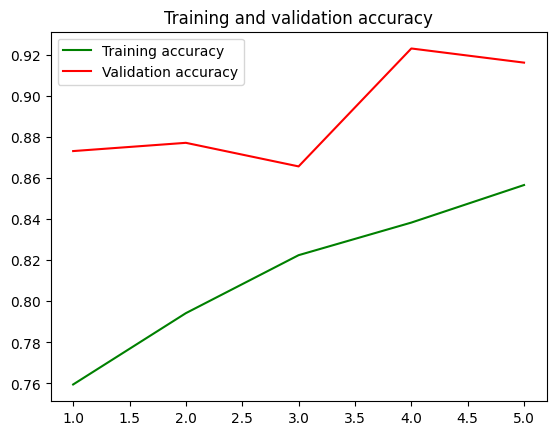

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(epochs,acc,label='Training accuracy',color='green')
plt.plot(epochs,val_acc,label='Validation accuracy',color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [25]:
model_evalution=model.evaluate(test_generator,verbose=1)
print("Loss: ",model_evalution[0])
print("Accuracy:",model_evalution[1])
print("Precision:",model_evalution[2])
print("Recall: ",model_evalution[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.9400 - loss: 0.1899 - precision: 0.9567 - recall: 0.9243
Loss:  0.21258334815502167
Accuracy: 0.9340997338294983
Precision: 0.9547349810600281
Recall:  0.9122467637062073


In [26]:
model.save('PDDS.keras')